<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/NLP_%EC%8B%AC%EC%B8%B5_Vanilla_RNN_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

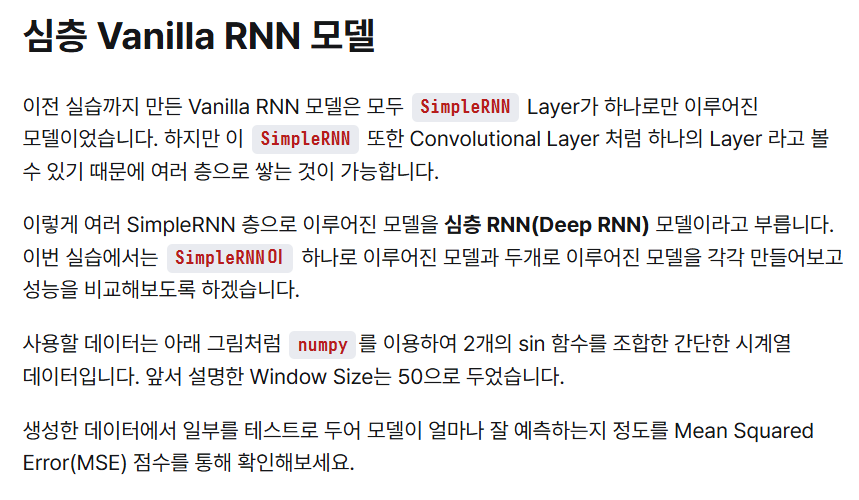

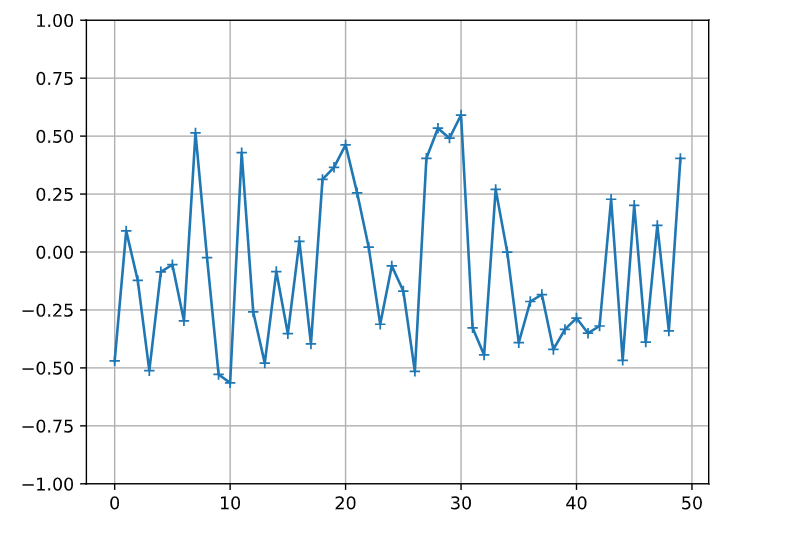

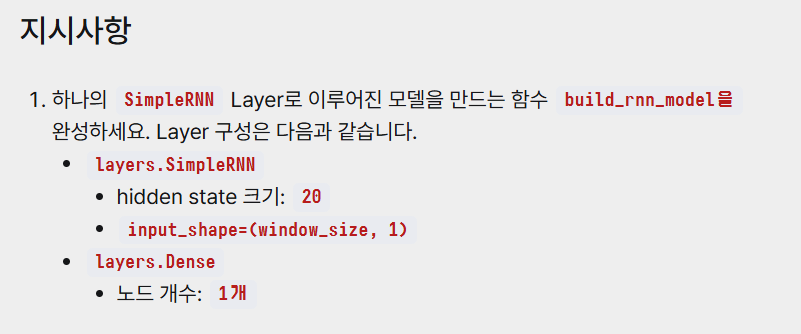

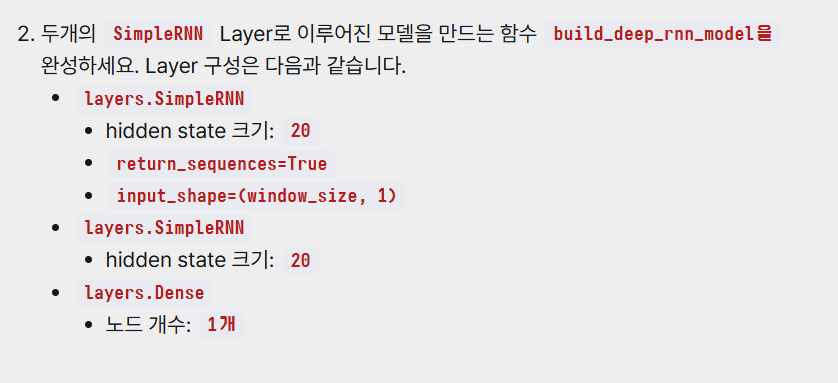

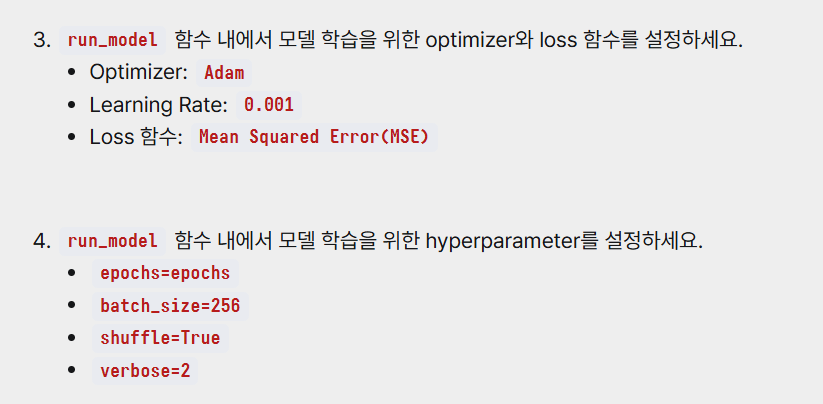

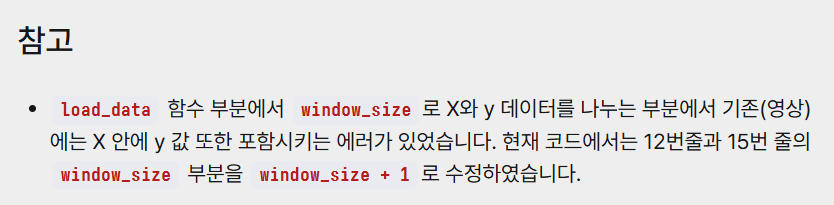

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

def load_data(num_data, window_size):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, num_data, 1)

    time = np.linspace(0, 1, window_size + 1)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.1 * np.sin((time - offsets2) * (freq2 * 10 + 10))
    series += 0.1 * (np.random.rand(num_data, window_size + 1) - 0.5)

    num_train = int(num_data * 0.8)
    X_train, y_train = series[:num_train, :window_size], series[:num_train, -1]
    X_test, y_test = series[num_train:, :window_size], series[num_train:, -1]

    X_train = X_train[:, :, np.newaxis]
    X_test = X_test[:, :, np.newaxis]

    return X_train, X_test, y_train, y_test

def build_rnn_model(window_size):
    model = Sequential()

    # TODO: [지시사항 1번] SimpleRNN 기반 모델을 구성하세요.
    model.add(layers.SimpleRNN(20, input_shape=(window_size, 1))) # 자연어 데이터 아니므로 input_shape 추가해야함
    model.add(layers.Dense(1))

    return model

def build_deep_rnn_model(window_size):
    model = Sequential()

    # TODO: [지시사항 2번] 여러개의 SimpleRNN을 가지는 모델을 구성하세요.
    model.add(layers.SimpleRNN(20, return_sequences=True, input_shape=(window_size, 1)))
    # return_sequences 가 뭔지 : False는 다대일 마지막 값만 사용이 default, 우리는 각 시점의 출력값을 모두 쓰는 다대다 이기 때문에 True로 함
    model.add(layers.SimpleRNN(20)) # sequence 보고 예측해야하므로 각 시점이 입력값으로 사용될 수 있게 만들어줌
    model.add(layers.Dense(1))

    return model

def run_model(model, X_train, X_test, y_train, y_test, epochs=20, name=None):
    # TODO: [지시사항 3번] 모델 학습을 위한 optimizer와 loss 함수를 설정하세요.
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="mse")

    # TODO: [지시사항 4번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(X_train, y_train, epochs=epochs, batch_size=256, shuffle=True, verbose=2)

    # 테스트 데이터셋으로 모델을 테스트합니다.
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    print("[{}] 테스트 MSE: {:.5f}".format(name, test_loss))
    print()

    return optimizer, hist

def main():
    tf.random.set_seed(2022)
    np.random.seed(2022)

    window_size = 50
    X_train, X_test, y_train, y_test = load_data(10000, window_size)

    rnn_model = build_rnn_model(window_size)
    run_model(rnn_model, X_train, X_test, y_train, y_test, name="RNN")

    deep_rnn_model = build_deep_rnn_model(window_size)
    run_model(deep_rnn_model, X_train, X_test, y_train, y_test, name="Deep RNN")


if __name__ == "__main__":
    main()


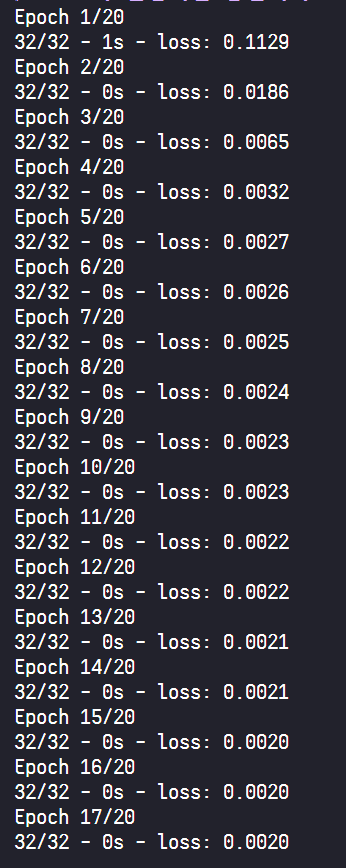

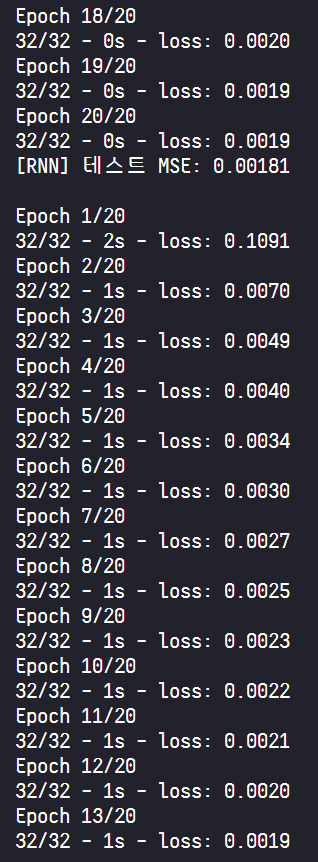

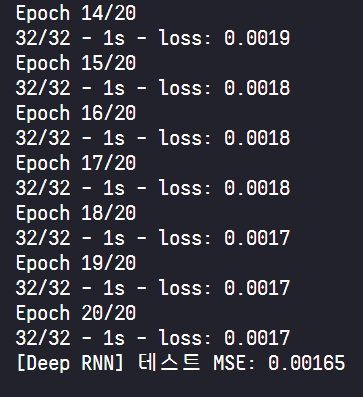